<a href="https://colab.research.google.com/github/TKing151/MachineLearning/blob/main/PoissonRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import PoissonRegressor

In [2]:
p = PoissonRegressor()

In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sd = 'https://raw.githubusercontent.com/mahat/PoissonRegression/master/data/StudentData.csv'
data = pd.read_csv(sd)

In [5]:
data.describe()

,id,num_awards,prog,math
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.630000,2.025000,52.645000
std,57.879185,1.052921,0.690477,9.368448
min,1.000000,0.000000,1.000000,33.000000
25%,50.750000,0.000000,2.000000,45.000000
50%,100.500000,0.000000,2.000000,52.000000
75%,150.250000,1.000000,2.250000,59.000000
max,200.000000,6.000000,3.000000,75.000000


In [6]:
histData = []
uniqProgs = sorted(data['prog'].unique())
for elem in uniqProgs:
    histData.append(data[data['prog'] == elem]['num_awards'].values)

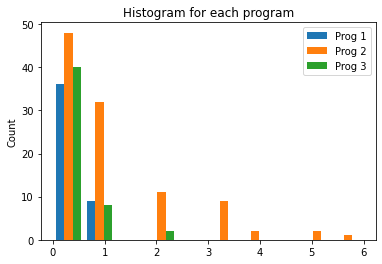

In [9]:
plt.hist(tuple(histData),bins=10,  histtype='bar',label= map(lambda x: 'Prog '+ str(x),uniqProgs))
plt.legend()
plt.ylabel('Count')
plt.title('Histogram for each program')
plt.show()

In [11]:
prog_dummies = pd.get_dummies(data['prog']).rename(columns=lambda x: 'prog_' + str(x))
dataWithDummies = pd.concat([data, prog_dummies], axis=1)
dataWithDummies .drop(['prog', 'prog_3'], inplace=True, axis=1)
dataWithDummies = dataWithDummies .applymap(np.int)
dataWithDummies.head()

<ipython-input-11-41bd983aa6c9>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataWithDummies = dataWithDummies .applymap(np.int)


,id,num_awards,math,prog_1,prog_2
0,45,0,41,0,0
1,108,0,41,1,0
2,15,0,44,0,0
3,67,0,42,0,0
4,153,0,40,0,0


In [12]:
feat_cols = ['math', 'prog_1', 'prog_2']
X = [elem for elem in dataWithDummies[feat_cols].values]
# adding constant to adding bias
X = sm.add_constant(X, prepend=False)
Y = [elem for elem in dataWithDummies['num_awards'].values]

In [14]:
poisson_mod = sm.Poisson(Y, X)
poisson_res = poisson_mod.fit(method="newton")
poisson_res.summary()

Optimization terminated successfully.
         Current function value: 0.913761
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                        Poisson   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                  0.2118
Time:                        02:06:51   Log-Likelihood:                -182.75
converged:                       True   LL-Null:                       -231.86
Covariance Type:            nonrobust   LLR p-value:                 3.747e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0702      0.011      6.619      0.000       0.049       0.091
x2            -0.3698      0.441     -0.838      0.402      -1.234       0.495
x3             0.7140      0.320      2.231      0.026       0.087       1.341
const         -4.8773      0.628     -7.764      0.000      -6.109      -3.646
==============================================================================
"""

In [15]:
predVals = poisson_res.predict(X)

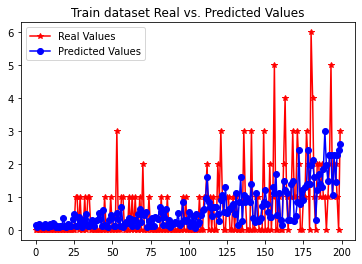

In [16]:
plt.plot(range(len(Y)), Y, 'r*-', range(len(Y)), predVals, 'bo-')
plt.title('Train dataset Real vs. Predicted Values')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()